# 1. Import libraries and Read S&P500 data

In [68]:
# Import the package pandas as pd
import pandas as pd

# Read the csv file using read_csv method of pandas
SPY_prices = pd.read_csv('SPY.csv', index_col=0, sep=';')

# SEt the index to datetime
SPY_prices.index = pd.to_datetime(SPY_prices.index)
SPY_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,26.453930,1003200
1993-01-02,43.96875,44.25000,43.96875,44.25000,26.642057,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.698507,201300
1993-03-02,44.40625,44.84375,44.37500,44.81250,26.980742,529400
1993-04-02,44.96875,45.09375,44.46875,45.00000,27.093624,531500


In [69]:
SPY_prices.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-02,331.230011,334.750000,331.190002,334.679993,334.679993,42070000
2020-11-02,336.160004,337.019989,334.679993,335.260010,335.260010,54864500
2020-12-02,336.829987,337.649994,336.429993,337.420013,337.420013,43992700
2020-02-13,335.859985,338.119995,335.559998,337.059998,337.059998,54501900
2020-02-14,337.510010,337.730011,336.200012,337.600006,337.600006,64524200


# 2. Convert daily frequency to monthly frequency

In [70]:
SPY_prices = SPY_prices.asfreq('BM')
SPY_prices = SPY_prices.dropna()
SPY_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,26.453930,1003200.0
1993-02-26,44.43750,44.43750,44.18750,44.40625,26.736153,66200.0
1993-03-31,45.34375,45.46875,45.18750,45.18750,27.335020,111600.0
1993-04-30,44.12500,44.28125,44.03125,44.03125,26.635586,88500.0
1993-06-30,45.12500,45.21875,45.00000,45.06250,27.452597,437600.0


In [71]:
SPY_prices.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,295.970001,297.549988,295.920013,296.769989,295.318054,51662400.0
2019-10-31,304.130005,304.130005,301.730011,303.329987,301.845947,69053800.0
2019-11-29,314.859985,315.130005,314.059998,314.309998,312.772247,36592700.0
2019-12-31,320.529999,322.130005,320.149994,321.859985,321.859985,57077300.0
2020-01-31,327.000000,327.170013,320.730011,321.730011,321.730011,113845600.0


# 3. Calculate yearly returns

In [72]:
SPY_prices['yearly_returns'] = SPY_prices['Adj Close'].pct_change(12)
SPY_prices.head()

,Open,High,Low,Close,Adj Close,Volume,yearly_returns
Date,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,26.453930,1003200.0,NaN
1993-02-26,44.43750,44.43750,44.18750,44.40625,26.736153,66200.0,NaN
1993-03-31,45.34375,45.46875,45.18750,45.18750,27.335020,111600.0,NaN
1993-04-30,44.12500,44.28125,44.03125,44.03125,26.635586,88500.0,NaN
1993-06-30,45.12500,45.21875,45.00000,45.06250,27.452597,437600.0,NaN


In [73]:
SPY_prices.tail()

,Open,High,Low,Close,Adj Close,Volume,yearly_returns
Date,,,,,,,
2019-09-30,295.970001,297.549988,295.920013,296.769989,295.318054,51662400.0,0.041096
2019-10-31,304.130005,304.130005,301.730011,303.329987,301.845947,69053800.0,0.143102
2019-11-29,314.859985,315.130005,314.059998,314.309998,312.772247,36592700.0,0.162909
2019-12-31,320.529999,322.130005,320.149994,321.859985,321.859985,57077300.0,0.312239
2020-01-31,327.000000,327.170013,320.730011,321.730011,321.730011,113845600.0,0.214471


# 4. Calculate holding period returns

In [74]:
SPY_prices['future_1_month_returns'] = SPY_prices['Adj Close'].pct_change(1).shift(-1)
SPY_prices = SPY_prices.dropna()
SPY_prices.head()

,Open,High,Low,Close,Adj Close,Volume,yearly_returns,future_1_month_returns
Date,,,,,,,,
1994-02-28,46.937500,47.06250,46.81250,46.81250,28.892830,333000.0,0.092194,-0.041901
1994-03-31,44.468750,44.68750,43.53125,44.59375,27.682203,788800.0,0.035385,0.011212
1994-04-29,44.875000,45.15625,44.81250,45.09375,27.992571,481900.0,0.024055,0.015939
1994-05-31,45.734375,45.90625,45.65625,45.81250,28.438753,160000.0,0.067698,-0.022914
1994-06-30,44.828125,44.84375,44.31250,44.46875,27.787102,271900.0,0.012185,0.032327


In [75]:
SPY_prices.tail()

,Open,High,Low,Close,Adj Close,Volume,yearly_returns,future_1_month_returns
Date,,,,,,,,
2019-08-30,294.220001,294.239990,291.420013,292.450012,289.681458,62901200.0,0.027297,0.019458
2019-09-30,295.970001,297.549988,295.920013,296.769989,295.318054,51662400.0,0.041096,0.022105
2019-10-31,304.130005,304.130005,301.730011,303.329987,301.845947,69053800.0,0.143102,0.036198
2019-11-29,314.859985,315.130005,314.059998,314.309998,312.772247,36592700.0,0.162909,0.029055
2019-12-31,320.529999,322.130005,320.149994,321.859985,321.859985,57077300.0,0.312239,-0.000404


# 5. Define strategy logic

In [76]:
# Import numpy package as np
import numpy as np

# Generate trading signals
SPY_prices['positions'] = np.where(SPY_prices['yearly_returns'] > 0, 1, -1)

SPY_prices.head()

,Open,High,Low,Close,Adj Close,Volume,yearly_returns,future_1_month_returns,positions
Date,,,,,,,,,
1994-02-28,46.937500,47.06250,46.81250,46.81250,28.892830,333000.0,0.092194,-0.041901,1
1994-03-31,44.468750,44.68750,43.53125,44.59375,27.682203,788800.0,0.035385,0.011212,1
1994-04-29,44.875000,45.15625,44.81250,45.09375,27.992571,481900.0,0.024055,0.015939,1
1994-05-31,45.734375,45.90625,45.65625,45.81250,28.438753,160000.0,0.067698,-0.022914,1
1994-06-30,44.828125,44.84375,44.31250,44.46875,27.787102,271900.0,0.012185,0.032327,1


In [77]:
SPY_prices.tail()

,Open,High,Low,Close,Adj Close,Volume,yearly_returns,future_1_month_returns,positions
Date,,,,,,,,,
2019-08-30,294.220001,294.239990,291.420013,292.450012,289.681458,62901200.0,0.027297,0.019458,1
2019-09-30,295.970001,297.549988,295.920013,296.769989,295.318054,51662400.0,0.041096,0.022105,1
2019-10-31,304.130005,304.130005,301.730011,303.329987,301.845947,69053800.0,0.143102,0.036198,1
2019-11-29,314.859985,315.130005,314.059998,314.309998,312.772247,36592700.0,0.162909,0.029055,1
2019-12-31,320.529999,322.130005,320.149994,321.859985,321.859985,57077300.0,0.312239,-0.000404,1


# 6. Calculate Strategy Returns

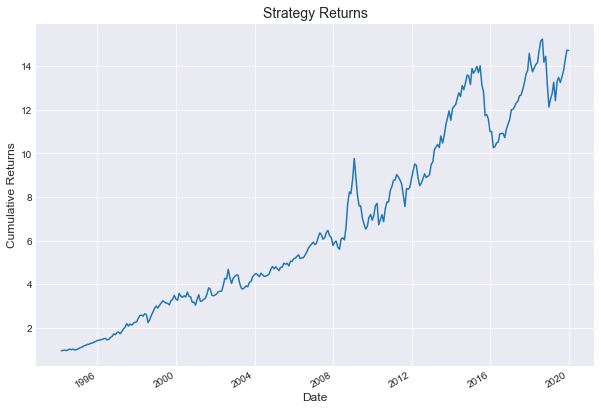

In [78]:
# Calculate Strategy Returns
SPY_prices['strategy_return'] = SPY_prices['future_1_month_returns'] * SPY_prices['positions']

# Calculate the cumulative strategy returns
cumulative_strategy_returns = (SPY_prices['strategy_return'] +1).cumprod()

# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot cumulative strategy returns
cumulative_strategy_returns.plot(figsize=(10, 7))

# Set title and labels for the plot
plt.title('Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.show()

# 7. Analyse Strategy Performance

### 7.1  Calculate total/absolute returns

In [79]:
# Calculate total return
total_returns = (cumulative_strategy_returns.iloc[-1]-1)*100

print('The total returns from strategy {:,.2f}%'.format(total_returns))

The total returns from strategy 1,372.32%


### 7.2 Calculate annualised returns

In [80]:
# Total number of months
total_months = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
cagr = (cumulative_strategy_returns.iloc[-1]**(12/total_months)-1)*100
print('The CAGR from strategy is {:,.2f}%'.format(cagr))

The CAGR from strategy is 11.16%


### 7.3 Calculate annualised volatility

In [81]:
# Calculte annualised volatility
annualised_volatility = np.std(SPY_prices['strategy_return'])*(12**0.5)*100
print('The annalised volatility from strategy is {:,.2f}%'.format(annualised_volatility))

The annalised volatility from strategy is 14.43%


### 7.4 Calculate Sharpe ratio

In [82]:
# Calculate Sharpe ratio
sharpe = (np.mean(SPY_prices['strategy_return']) /
          np.std(SPY_prices['strategy_return'])*(12**0.5))
print("The Sharpe ratio is %.2f" % sharpe)

The Sharpe ratio is 0.81


### 7.5 Calculate maximum drawdown

In [83]:
def calc_drawdown(cum_rets):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


drawdown = calc_drawdown(cumulative_strategy_returns)
max_dd = drawdown.min()*100

print('The maximum drawdown is {:,.2f}%'.format(max_dd))

The maximum drawdown is -33.13%


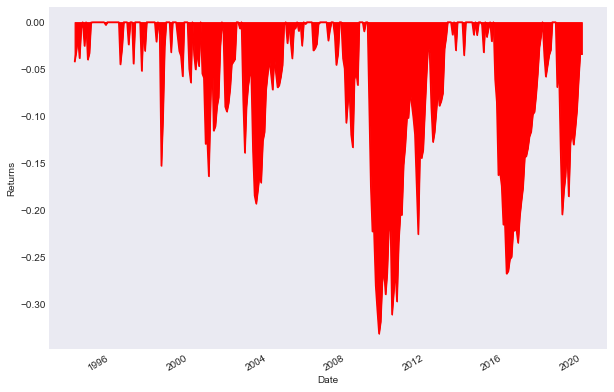

In [84]:
def plot_drawdown(drawdown):

    # Plot drawdown
    plt.figure(figsize=(10, 7))
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()


plot_drawdown(drawdown)